<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>CS 4613<br />
Project 2: Sudoku</p>
</blockquote></th>
<th><blockquote>
<p>Elizabeth Akindeko<br />
Spring 2022</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> How to run program

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="5"><p>1.</p>
<p>2.</p>
<p>3.</p></th>
<th colspan="2"><blockquote>
<p>Required files:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>-</th>
<th><blockquote>
<p>backtracking_sodoku.py</p>
</blockquote></th>
</tr>
<tr class="header">
<th>-</th>
<th><blockquote>
<p>*some input file like “input.txt”</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>-</th>
<th><blockquote>
<p>*some output file like “output1.txt”</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>Please put files in the same folder so that the sudoku input can be
retrieved Already added possible files in folder to save time (you can
edit/delete):</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_cc8d87f5e4434b96965db8842a35cbd3/media/image1.png"
> style="width:4.42639in;height:3.26111in" />
>
> 4\. Right below, please change first argument of ‘file_to_grid’
> function to the input file being tested:
>
> <img
> src="attachment:vertopal_cc8d87f5e4434b96965db8842a35cbd3/media/image2.png"
> style="width:6.5in;height:0.90555in" />
>
> 5\. Lastly, please change first argument of the ‘grid_to_file’
> function to the appropriate output file name
>
> <img
> src="attachment:vertopal_cc8d87f5e4434b96965db8842a35cbd3/media/image3.png"
> style="width:6.5in;height:0.66667in" />

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>6.<br />
7.</p>
</blockquote></th>
<th><blockquote>
<p>Run program<br />
Output will look like this, and solved problem will be written to the
output file</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_cc8d87f5e4434b96965db8842a35cbd3/media/image4.png"
> style="width:6.5in;height:5.11528in" />
>
> Constraint Satisfaction Problem
>
> Variables: \*empty sudoku grid slots\*  
> Domains: {1, 2, 3, 4, 5, 6, 7, 8, 9}  
> Constraints:  
> - Variable value (from domain) can only be the same in its row  
> - Variable value (from domain) can only be the same in its column  
> -  
> Variable value (from domain) can only be the same in its 3x3 section
> of the sudoku grid
>
> Source Code
>
> backtracking_sodoku.py
>
> import copy
>
> """ Grid representation below; list of 9 lists; each list being a row
> of the 9x9 version """ var_grid =
> \[\[\],\[\],\[\],\[\],\[\],\[\],\[\],\[\],\[\]\]
>
> def file_to_grid(filename, grid):  
> """  
> Writes numbers from input file to a grid  
> """  
> modu = open(filename, "r")  
> rowNo = 0  
> for line in modu:  
> if rowNo \<= 8:  
> try:  
> numRow = list(map(int,line\[:-1\].split(' '))) except:  
> numRow = list(map(int,line\[:-2\].split(' '))) if line\[-1\] !=
> '\n':  
> numRow = list(map(int,line.split(' '))) grid\[rowNo\]= numRow  
> rowNo += 1  
> modu.close()
>
> def grid_to_file(filename, grid):  
> s = print_grid(grid)  
> modu = open(filename, "w")  
> modu.write(s)  
> modu.close()

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>def print_grid(grid):</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>""" Prints and returns a grid, in input/output file format """</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> s = ''  
> for row in range(9):  
> for col in range(9):  
> s = s + str(grid\[row\]\[col\]) + ' '  
> if col == 8:  
> s += '\n'  
> print(s)  
> return s
>
> def count_zeros(grid):  
> """ counts total unassigned vars in grid/problem """ total = 0  
> for row in range(9):  
> for col in range(9):  
> if grid\[row\]\[col\] == 0:  
> total+=1  
> return total
>
> def grid_3x3_test(grid, num, row, col):  
> """  
> Given row and column, it finds the respective 3x3 grid  
> in which the number belongs on the sodoku grid  
> It then checks that the number is the only of its kind  
> in the 3x3 grid. Here it counts to see if more than 1 exists """  
> grid_row_start = (row // 3) \* 3 \# Gets 3x3 row  
> grid_col_start = (col // 3) \* 3 \# Gets 3xt col
>
> total = 0  
> for r in range(3):  
> for c in range(3):  
> if grid\[grid_row_start+r\]\[grid_col_start+c\] == num: total += 1  
> if total \> 1:  
> return False  
> return True
>
> def grid_row_test(grid, num, row):

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>"""</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>Checks that a number is the only of its kind in a given row</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> """  
> total_in_row = 0  
> for nums in grid\[row\]:  
> if nums == num:  
> total_in_row += 1  
> if total_in_row \> 1:  
> return False  
> return True
>
> def grid_col_test(grid, num, col):  
> """  
> checks that a number is the only of its kind in a given column """  
> total_in_col = 0  
> for r in range(9):  
> if grid\[r\]\[col\] == num:  
> total_in_col += 1  
> if total_in_col \> 1:  
> return False  
> return True
>
> def constraint_tests(grid, num, row, col):  
> """  
> Tests that num is not zero, then if it is the only of its kind in
> given grid row, col, and its 3x3 grid """  
> if num == 0:  
> return False  
> test_passed = True  
> test_passed = grid_row_test(grid, num, row)  
> if test_passed is False:  
> return False  
> test_passed = grid_col_test(grid, num, col)  
> if test_passed is False:  
> return False  
> test_passed = grid_3x3_test(grid, num, row, col) if test_passed is
> False:  
> return False

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>return test_passed</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>def degree_heuristic(grid, row, col):</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> """  
> counts \# of unassigned in row, col, and 3x3 grid and returns  
> total. The value in given position (row, col) must be 0  
> """  
> zero_count = 0  
> for ints in grid\[row\]:  
> if ints == 0:  
> zero_count +=1  
> for i in range(9):  
> if grid\[i\]\[col\] == 0:  
> zero_count+=1  
> grid_row_start = (row//3)\*3 \# Get which 3x3 row  
> grid_col_start = (col//3)\*3 \# Get which 3x3 column  
> for i in range(3):  
> for j in range(3):  
> if grid\[grid_row_start+i\]\[grid_col_start+j\]==0:  
> if grid_row_start+i!= row and grid_col_start+j!= col: \#

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>skips row and col</p>
</blockquote></th>
<th>zero_count+=1</th>
<th><blockquote>
<p># count 0s in 3x3 grid</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> return zero_count - 2 \# subtract itself (row and col, as grid skips
> row and col)
>
> def count_legal_moves(grid, row, col):  
> """  
> Reduces domain set by scanning the grid for values taken by
> neighboring variables / positions  
> """  
> domain_set = \[1, 2, 3, 4, 5, 6, 7, 8, 9\]  
> for ints in grid\[row\]:  
> if ints != 0:  
> if ints in domain_set:  
> domain_set.remove(ints)  
> for i in range(9):  
> if grid\[i\]\[col\] != 0:  
> if grid\[i\]\[col\] in domain_set:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="2">domain_set.remove(grid[i][col])</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>grid_row_start = (row//3)*3</p>
</blockquote></td>
<td><blockquote>
<p># First get which 3x3 row</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>grid_col_start = (col//3)*3</p>
</blockquote></th>
<th><blockquote>
<p># Then get which 3x3 col</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> for i in range(3):  
> for j in range(3):  
> if grid\[grid_row_start+i\]\[grid_col_start+j\]!=0:  
> if grid\[grid_row_start+i\]\[grid_col_start+j\] in domain_set:
>
> domain_set.remove(grid\[grid_row_start+i\]\[grid_col_start+j\]) return
> len(domain_set), domain_set
>
> def check_visited(row,col,visited,root):  
> """  
> Visited it a list of failed roots in the tree.
>
> 'check_visited' ensures that positions in Visited are visitable- but
> unable to be selected as a root if they failed before.. as a root  
> """  
> if \[row,col\] in visited:  
> if root!=0:  
> return True  
> else:  
> return False  
> else:  
> return True
>
> def sel_unassigned_var(grid, visited, root):  
> """  
> Find grid pos based on \# of legal moves and, \# of constraints  
> (neighbors)  
> i.e total \# of unassigned in rows+columns and 3x3 grid as these
> variables share constraints of unique row,column and 3x3 grid numbers
> """  
> min_rem_val = 8  
> same_count_lst= \[\]  
> for row in range(9):  
> for col in range(9): \# loop through every var  
> if grid\[row\]\[col\]==0: \# if 0, we found an unassigned var if
> check_visited(row, col, visited, root): \# proceed if var has not been
> a root that failed  
> rem_moves,domain = count_legal_moves(grid, row, col)

| if rem_moves\>0: |
|------------------|

| if rem_moves\<min_rem_val: |
|----------------------------|

> min_rem_val = rem_moves unassigned_neighbors =
> degree_heuristic(grid,row,col)  
> same_count_lst.clear()
>
> same_count_lst.append(\[\[row,col\],domain,unassigned_neighbors\])
> elif rem_moves == min_rem_val:  
> unassigned_neighbors =  
> degree_heuristic(grid,row,col)
>
> same_count_lst.append(\[\[row,col\],domain,unassigned_neighbors\])  
> """  
> using degree heuristic as tie breaker, returns variable's pos and
> domain (ones needed)  
> """  
> max_constraints_count = -1  
> max_constraints_var_info = \[\]  
> for item in same_count_lst:  
> if item\[2\] \> max_constraints_count:  
> max_constraints_count = item\[2\]  
> max_constraints_var_info = item  
> return max_constraints_var_info
>
> def backtracking(grid, visited, root):  
> """  
> Recursive alg to solve sodoku problem  
> """  
> if count_zeros(grid)==0:  
> return True, grid, visited  
> var_info = sel_unassigned_var(grid, visited, root)  
> if len(var_info)==0:  
> return False, grid, visited  
> for legal_move in var_info\[1\]:  
> grid\[var_info\[0\]\[0\]\]\[var_info\[0\]\[1\]\]= legal_move  
> if constraint_tests(grid, legal_move, var_info\[0\]\[0\],
> var_info\[0\]\[1\]):  
> result, grid, unimportant_visited = backtracking(grid, visited,
> root+1)

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>if result:</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>return result, grid, visited # return if solved (exit</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> loop)  
> grid\[var_info\[0\]\[0\]\]\[var_info\[0\]\[1\]\]= 0 \# reset var to
> zero if not return False, grid, var_info\[0\]
>
> def solve(grid):  
> """  
> The above backtracking relies on the first variable it selects.
> 'solve' goes to select a new first variable if the first does'nt work
> and etc..
>
> """  
> total_unassigned= count_zeros(grid)  
> visited = \[\]  
> result_grid = \[\]  
> while len(visited)!=total_unassigned:  
> result_grid = copy.deepcopy(grid)  
> res, result_grid, pos = backtracking(result_grid, visited, 0) if
> res:  
> return res, result_grid, visited  
> visited.append(pos)  
> return False, result_grid, visited
>
> def main():  
> """  
> Possible files already in folder:  
> """  
> in_1 = "Input1.txt"  
> in_2 = "Input2.txt"  
> in_3 = "Input3.txt"  
> in_4 = "Sample_input.txt"  
> op_1 = "Output1.txt"  
> op_2 = "Output2.txt"  
> op_3 = "Output3.txt"  
> op_4 = "Sample_Output.txt"  
> op_5 = "Sample_Output2.txt"
>
> """ \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* PLEASE EDIT \| READING FROM FILE
> \| GRID SETUP \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* """  
> file_to_grid(in_1, var_grid) \# please change first argument to the

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>file being solved</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>print("\n*********** SHOWING INPUTED GRID BELOW **********")</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> print_grid(var_grid)

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>print("\n*********** SOLVING BELOW **********")</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>""" **************** SOLVER **************** """</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>res,res_grid, visited = solve(var_grid)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| """ \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* PLEASE EDIT \| WRITING TO FILE \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\* |
|------------------------------------------------------------------------|

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>"""</th>
<th><blockquote>
<p>grid_to_file(op_1, res_grid)</p>
</blockquote></th>
<th><blockquote>
<p># please change first argument to the</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>appropriate solution file</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>""" *********** OPTIONAL PRINTING TO OUTPUT *********** """</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> print("\n\*\*\*\*\*\*\*\*\*\*\* OPTIONAL DETAILS BELOW
> \*\*\*\*\*\*\*\*\*\*")
>
> print("Problem solved? ", res)
>
> print("Visited (aka failed) root positions/vars:", visited)
>
> print("# of zeros in input grid: ", count_zeros(var_grid))

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>print("# of zeros in output grid: ", count_zeros(res_grid))</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>main()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Output Files
>
> **Output.txt**  
> 1 3 2 5 6 9 7 8 4  
> 6 8 5 2 7 4 1 9 3  
> 4 9 7 8 3 1 2 6 5  
> 8 5 6 4 9 2 3 1 7  
> 3 7 1 6 8 5 9 4 2  
> 9 2 4 7 1 3 6 5 8  
> 2 4 9 3 5 6 8 7 1  
> 5 1 8 9 2 7 4 3 6  
> 7 6 3 1 4 8 5 2 9
>
> **Output2.txt**  
> 4 5 3 6 7 8 9 1 2  
> 2 8 1 5 3 9 7 6 4  
> 9 6 7 4 1 2 3 5 8
>
> 3 7 5 1 6 4 2 8 9  
> 6 9 4 2 8 3 5 7 1  
> 1 2 8 7 9 5 6 4 3  
> 8 3 6 9 5 1 4 2 7  
> 5 4 9 8 2 7 1 3 6  
> 7 1 2 3 4 6 8 9 5
>
> **Output3.txt**  
> 5 7 6 3 4 1 9 2 8  
> 8 2 1 9 6 5 7 4 3  
> 9 4 3 8 7 2 5 6 1  
> 1 6 8 4 5 7 3 9 2  
> 2 9 7 1 3 8 6 5 4  
> 4 3 5 2 9 6 1 8 7  
> 3 5 2 7 8 9 4 1 6  
> 6 1 4 5 2 3 8 7 9  
> 7 8 9 6 1 4 2 3 5
>
> Thank you for your time!
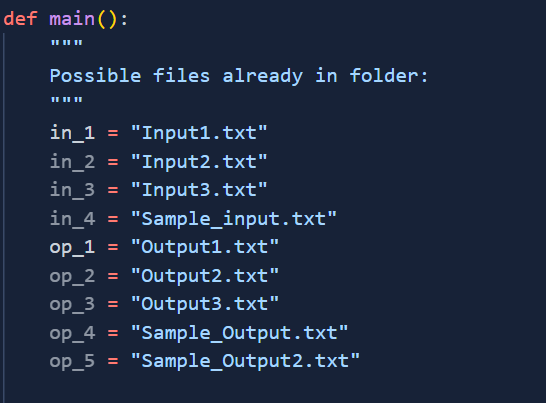
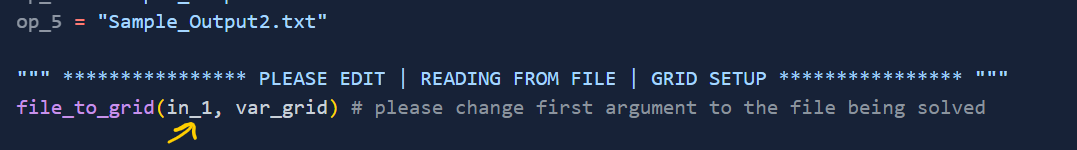
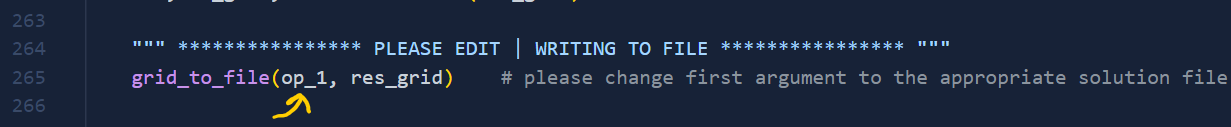
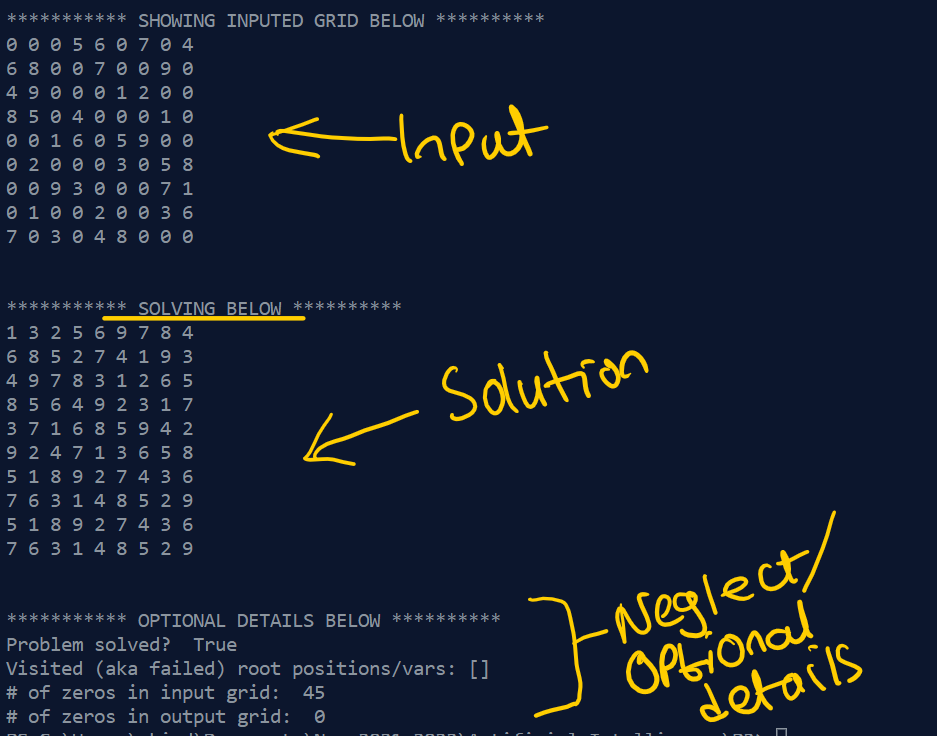